In [5]:
import statsmodels.stats.api as sms
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Firstly, we need to define the two conversion rates via proportion_effectsize. 
#The first element here (0.1) is simply the conversion rate of the site prior to running the test. Aka control conversion rate
#The second one (0.11) is the minimum conversion rate of the test that would make it worth it to make the change
p1_and_p2 = sms.proportion_effectsize(0.1, 0.13)
#Now we can run the function that after passing the two conversion rates above + power and significance, returns sample size
sample_size = sms.NormalIndPower().solve_power(p1_and_p2, power=0.8, alpha=0.05)
print("The required sample size per group is ~", round(sample_size))

The required sample size per group is ~ 1768


In [7]:
#Possible p2 values. We choose from 10.5% to 15% with 0.5% increments
possible_p2 = np.arange(.105, .155, .005)
possible_p2
#now let's estimate sample size for all those values and plot them

array([0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 , 0.145,
       0.15 ])

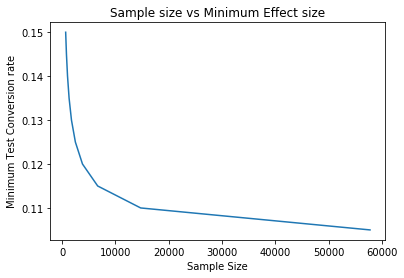

In [8]:
sample_size = []
for i in possible_p2:
   p1_and_p2 = sms.proportion_effectsize(0.1, i)
   sample_size.append(sms.NormalIndPower().solve_power(p1_and_p2, power=0.8, alpha=0.05))
plt.plot(sample_size, possible_p2)
plt.title("Sample size vs Minimum Effect size")
plt.xlabel("Sample Size")
plt.ylabel("Minimum Test Conversion rate")
plt.show()